In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [19]:
# Dropping missing in y
train = train.drop([train.index[17476], train.index[30024], train.index[30841]])
train = train.reset_index(drop=True)
y = train['DC201']
y = y.replace(['Layak Minum', 'Tidak Layak Minum'],
              [0,1])

In [20]:
categoric = ['DC024', 'DC205', 'DC213', 'DC214', 'DC215', 'DC217', 'DC226', 'DC230a', 'DC270a', 'DC109', 'DC235', 'DC237', 'DC237a', 'DC237b', 'DC237c', 'DC237d', 'DC237e', 'DC237f', 'DC241','DC252' ]
binary = ['DC025', 'DC206', 'DC207', 'DC208', 'DC209', 'DC210', 'DC211', 'DC212', 'DC219', 'DC230b', 'DC232', 'DC232b', 'DC242', 'DC244', 'DC246']
numerical = ['DC216', 'DC220', 'DC142a']

In [21]:
for col in train.columns:
    if col in (categoric+binary):
        train[col] = train[col].fillna(-1)
    
    if col in numerical:
        train[col] = train[col].fillna(train[col].mode()[0])


In [22]:
for col in test.columns:
    if col in (categoric+binary):
        test[col] = test[col].fillna(-1)
    
    if col in numerical:
        test[col] = test[col].fillna(test[col].mode()[0])


In [23]:
categorical_train = train[categoric]
binary_train = train[binary]
numerical_train = train[numerical]

In [24]:
categorical_test = test[categoric]
binary_test = test[binary]
numerical_test = test[numerical]

# Imputing

# One-Hot

In [25]:
raw_categorical = pd.concat([categorical_train, categorical_test], axis=0)
raw_categorical

,DC024,DC205,DC213,DC214,DC215,DC217,DC226,DC230a,DC270a,DC109,DC235,DC237,DC237a,DC237b,DC237c,DC237d,DC237e,DC237f,DC241,DC252
0,11,16.0,35.0,36.0,31.0,1,8.0,1.0,1,12.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,11,31.0,35.0,36.0,31.0,4,2.0,1.0,2,31.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,11,12.0,35.0,36.0,31.0,2,2.0,1.0,4,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,11,12.0,35.0,36.0,31.0,4,8.0,1.0,1,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,11,12.0,35.0,36.0,31.0,3,8.0,2.0,2,11.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,65,12.0,21.0,36.0,31.0,2,2.0,1.0,4,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11986,61,12.0,33.0,35.0,31.0,4,2.0,2.0,4,11.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
11987,74,12.0,35.0,35.0,31.0,2,5.0,1.0,2,11.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
11988,74,31.0,21.0,12.0,31.0,2,8.0,1.0,1,51.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [26]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
ohc.fit(raw_categorical)

dummies_train = pd.DataFrame(ohc.transform(categorical_train), columns= ohc.get_feature_names_out())
dummies_test = pd.DataFrame(ohc.transform(categorical_test), columns = ohc.get_feature_names_out())

c:\Users\HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
dummies_test.columns == dummies_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# Train-Test Processed

In [28]:
train_processed = pd.concat([dummies_train, binary_train, numerical_train], axis=1)
train_processed

,DC024_11,DC024_12,DC024_13,DC024_14,DC024_15,DC024_16,DC024_17,DC024_18,DC024_19,DC024_21,...,DC219,DC230b,DC232,DC232b,DC242,DC244,DC246,DC216,DC220,DC142a
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,80.0,60.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,0.0,0.0,1.0,1.0,2.0,44.0,70.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,0.0,0.0,1.0,1.0,2.0,35.0,75.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,0.0,-1.0,1.0,0.0,3.0,79.0,85.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,1.0,1.0,0.0,0.0,0.0,1.0,2.0,37.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,21.0,9.0
35960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,41.0,12.0
35961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,0.0,1.0,0.0,1.0,2.0,52.0,48.0
35962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,1.0,0.0,1.0,0.0,0.0,2.0,58.0,39.0


In [29]:
test_processed = pd.concat([dummies_test, binary_test, numerical_test], axis=1)
test_processed

,DC024_11,DC024_12,DC024_13,DC024_14,DC024_15,DC024_16,DC024_17,DC024_18,DC024_19,DC024_21,...,DC219,DC230b,DC232,DC232b,DC242,DC244,DC246,DC216,DC220,DC142a
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,1,1,29,52
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,0,0,1,42,18
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,0,1,2,46,78
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,1,0,1,46,20
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,1,3,47,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,0,0,2,36,70
11986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,0,2,43,120
11987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,1,1,0,1,0,0,2,45,72
11988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,0,0,1,1,20,9


In [34]:
train_np = np.array(train_processed)
test_np = np.array(test_processed)
y_np = np.array(y)

# Model

## LDA Data

In [52]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
tsne = TSNE(n_components=2)

train_transformed = pd.DataFrame(tsne.fit_transform(rs.fit_transform(train_processed)))
test_transformed = pd.DataFrame(tsne.fit_transform(rs.fit_transform(test_processed)))

train_pro_trans =  pd.concat([dummies_test, binary_test, numerical_test, train_transformed], axis=1, ignore_index=True)
test_pro_trans =  pd.concat([dummies_test, binary_test, numerical_test, test_transformed], axis=1,ignore_index=True)

In [53]:
train_transformed.to_csv('Data/train_tsne.csv', index=False)
test_transformed.to_csv('Data/test_tsne.csv', index=False)

In [99]:
train_pro_trans =  pd.concat([train_processed.reset_index(), train_transformed], axis=1)
test_pro_trans =  pd.concat([test_processed.reset_index(), test_transformed], axis=1)
train_pro_trans

,index,DC024_11,DC024_12,DC024_13,DC024_14,DC024_15,DC024_16,DC024_17,DC024_18,DC024_19,...,DC232,DC232b,DC242,DC244,DC246,DC216,DC220,DC142a,0,1
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,80.0,60.0,-30.995409,22.356384
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,2.0,44.0,70.0,-27.757343,12.878638
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,2.0,35.0,75.0,18.794312,37.284073
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-1.0,1.0,0.0,3.0,79.0,85.0,-71.208992,-19.957706
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,2.0,37.0,65.0,-2.725252,48.434811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35965,35965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,0.0,0.0,1.0,21.0,9.0,-59.999527,79.218620
35966,35966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,41.0,12.0,15.000904,5.821974
35967,35967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,2.0,52.0,48.0,3.196377,13.808781
35968,35968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2.0,58.0,39.0,-14.578894,-69.488770


In [58]:
train_np = np.array(train_processed)
test_np = np.array(test_processed)
y_np = np.array(y)

## Metrics

In [14]:
from sklearn.metrics import roc_auc_score, classification_report, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_validate
def plot_confusion_matrix(y_true, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a ConfusionMatrixDisplay object
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

    # Plot the confusion matrix
    cm_display.plot(cmap='Blues')

    # Customize the plot
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks([0, 1])  # Set x-axis tick labels
    plt.yticks([0, 1])  # Set y-axis tick labels
    plt.show()

    # Calculate TPR, TNR, FPR, FNR
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)
    
    print("True Positive Rate (TPR):", TPR)
    print("True Negative Rate (TNR):", TNR)
    print("False Negative Rate (FNR):", FNR)
    print("False Positive Rate (FPR):", FPR)

def Reporting(y_true,y_pred):
    print(f1_score(y_true,y_pred))
    print(roc_auc_score(y_true,y_pred))
    print(classification_report(y_true, y_pred))
    plot_confusion_matrix(y_true, y_pred)

In [35]:
import optuna
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
skcv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(train_np, y_np, test_size=0.2, random_state=42)

def objectiveimb_xgb(trial):
    params = {
        "num_round": trial.suggest_int("num_round", 10,1500),
        "max_depth": trial.suggest_int("max_depth", 10,250),
        "special_objective": trial.suggest_categorical("special_objective", ["focal", "weighted"]),
        "focal_gamma": trial.suggest_float("focal_gamma", 0, 5 ),
        "imbalance_alpha": trial.suggest_float("imbalance_alpha", 0.01, 10 )
        }

    model = imb_xgb(**params)

    model.fit(X_train,y_train)

    sigmoid_output = model.predict_determine(X_test, y=None) 
    f1 = f1_score(y_test, sigmoid_output, average='micro')

    return f1

# Model

In [55]:
!pip install imbalance-xgboost -q


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from imxgboost.imbalance_xgb import imbalance_xgboost as imb_xgb

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objectiveimb_xgb, n_trials=50)

In [ ]:
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'special_objective': 'weighted', 'focal_gamma': 4.327557003858994, 'imbalance_alpha': 0.5146168969315442}
Best Score: 0.9046378810220337


{'special_objective': 'focal', 'focal_gamma': 1.0212593138293644, 'imbalance_alpha': 7.145321637390701}<br>
{'num_round': 901, 'max_depth': 102, 'special_objective': 'weighted', 'imbalance_alpha': 9.858737129113221}

c:\Users\HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


0.2680901542111507
0.5784041055202306
              precision    recall  f1-score   support

           0       0.92      1.00      0.95      6493
           1       0.79      0.16      0.27       700

    accuracy                           0.91      7193
   macro avg       0.85      0.58      0.61      7193
weighted avg       0.90      0.91      0.89      7193



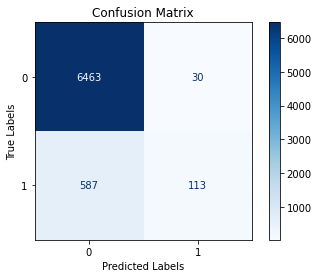

True Positive Rate (TPR): 0.16142857142857142
True Negative Rate (TNR): 0.9953796396118897
False Negative Rate (FNR): 0.8385714285714285
False Positive Rate (FPR): 0.004620360388110273


In [36]:
params1 = {'special_objective': 'weighted', 'focal_gamma': 4.327557003858994, 'imbalance_alpha': 0.5146168969315442}
model = imb_xgb(**params1)
model.fit(X_train,y_train)

y_pred = model.predict_determine(X_test, y=None) 

Reporting(y_test,y_pred)

c:\Users\HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


0.4008179959100205
0.6336855074695826
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6493
           1       0.71      0.28      0.40       700

    accuracy                           0.92      7193
   macro avg       0.82      0.63      0.68      7193
weighted avg       0.91      0.92      0.90      7193



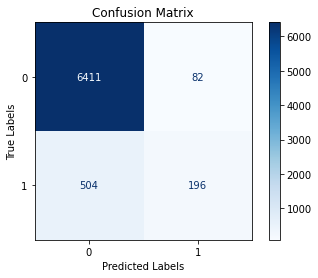

True Positive Rate (TPR): 0.28
True Negative Rate (TNR): 0.9873710149391652
False Negative Rate (FNR): 0.72
False Positive Rate (FPR): 0.012628985060834746


In [37]:
params1 = {'special_objective': 'focal', 'focal_gamma': 1.0212593138293644, 'imbalance_alpha': 7.145321637390701}
model = imb_xgb(**params1)
model.fit(X_train,y_train)

y_pred = model.predict_determine(X_test, y=None) 

Reporting(y_test,y_pred)

c:\Users\HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
c:\Users\HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


0.4875301689460982
0.6979471298761304
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6493
           1       0.56      0.43      0.49       700

    accuracy                           0.91      7193
   macro avg       0.75      0.70      0.72      7193
weighted avg       0.90      0.91      0.91      7193



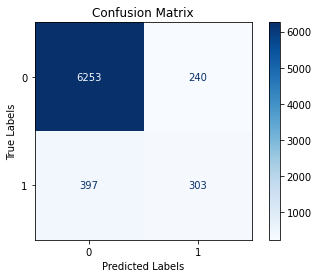

True Positive Rate (TPR): 0.4328571428571429
True Negative Rate (TNR): 0.9630371168951178
False Negative Rate (FNR): 0.5671428571428572
False Positive Rate (FPR): 0.03696288310488218


In [38]:
params1 = {'num_round': 901, 'max_depth': 102, 'special_objective': 'weighted', 'imbalance_alpha': 9.858737129113221}
model = imb_xgb(**params1)
model.fit(X_train,y_train)

y_pred = model.predict_determine(X_test, y=None) 

Reporting(y_test,y_pred)